### Copy cleaned dataset for use in model training

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn: Import Simple Imputer
from sklearn.impute import SimpleImputer

#sklearn: Import Standard Scaler
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Import the appropriate library and fit lr model
from sklearn.linear_model import LinearRegression

# Linear least squares with L2 regularization
from sklearn.linear_model import Ridge, RidgeCV

# Imports similar to Ridge, this time for Lasso
from sklearn.linear_model import Lasso, LassoCV

# sklearn: Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score
#set_style
plt.style.use('fivethirtyeight')

#configure for retina display
%config InlineBackend.figure_format = 'retina'

# sklearn: Import metrics.
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import statsmodels.api as sm

In [4]:
df_new = pd.read_csv('../datasets/cleaned_train_data')

In [9]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
saleprice,2033.0,178849.543532,73440.103247,12789.0,129500.000000,161000.00000,213000.000000,485000.000000
building_age,2033.0,36.192327,30.035427,0.0,7.000000,34.00000,54.000000,136.000000
neighborhood_by_medianprice,2033.0,4.811608,2.253698,1.0,3.000000,5.00000,6.000000,9.000000
positive_features,2033.0,1.892277,0.403850,0.0,2.000000,2.00000,2.000000,4.000000
remodeled_home,2033.0,0.460895,0.498591,0.0,0.000000,0.00000,1.000000,1.000000
overall_home_quality,2033.0,6.083620,1.397725,1.0,5.000000,6.00000,7.000000,10.000000
single_storey_home,2033.0,0.137727,0.344699,0.0,0.000000,0.00000,0.000000,1.000000
multiple_storey_home,2033.0,0.299065,0.457961,0.0,0.000000,0.00000,1.000000,1.000000
quality_of_exterior_material,2033.0,3.394491,0.574909,2.0,3.000000,3.00000,4.000000,5.000000
type_of_exterior_covering_house,2033.0,7.749139,2.032955,2.0,6.000000,7.00000,10.000000,10.000000


### Now time to rename the columns

In [10]:
df_new.head()

,saleprice,building_age,neighborhood_by_medianprice,positive_features,remodeled_home,overall_home_quality,single_storey_home,multiple_storey_home,quality_of_exterior_material,type_of_exterior_covering_house,...,basement_quality,finished_basement_in_sqft,basement_ceiling_height,heater_quality,kitchen_quality,fireplace_quality,total_number_of_baths,finished_upstairs_in_sqft,rooms_upstairs,size_of_rooms
0,130500,34,3,1,1,6,0,1,4,7,...,3,3198.0,1,5,4,0,2.5,1479,6,246.500000
1,220000,13,6,2,1,7,0,1,4,10,...,4,3822.0,1,5,4,3,3.5,2122,8,265.250000
2,109000,57,4,2,1,5,0,0,3,10,...,3,4386.0,1,3,4,0,2.0,1057,5,211.400000
3,174000,4,7,2,1,5,0,1,3,10,...,4,0.0,1,4,3,0,2.5,1444,7,206.285714
4,138500,110,6,2,1,6,1,0,3,7,...,2,0.0,1,3,3,0,2.0,1445,6,240.833333


In [11]:
df_new.rename(columns={'saleprice': 'saleprice', 
                          'age': 'building_age',
                           'neighborhood_numeric': 'neighborhood_by_medianprice', 
                           'local_conditions': 'positive_features',
                           'was_remodeled': 'remodeled_home',
                           'overall_qual': 'overall_home_quality',
                           'house_style_numeric_1.5': 'single_storey_home', 
                           'house_style_numeric_2.0': 'multiple_storey_home',
                           'exter_qual': 'quality_of_exterior_material', 
                           'external_feature': 'type_of_exterior_covering_house', 
                           'bldg_type_TwnhsE': 'middle_unit_townhouse',
                           'bldg_type_Twnhs': 'end_unit_townhouse', 
                           'bldg_type_2fmCon': 'family_house', 
                           'nicer_roof': 'good_roof_quality', 
                           'mas_vnr_area': 'masonry_veneer_sqft',
                           'functional': 'home_functionality',
                           'lot_frontage': 'lot_frontage',
                           'lot_area': 'lot_size', 
                           'combined_porch_outside_sf': 'outdoor_porch_space',
                           'garage_fin*sqft': 'garage_space', 
                           'garage_cars': 'size_of_car_garage',
                           'paved_drive': 'paved_driveway',
                           'bsmt_qual': 'basement_quality',
                           'bsmt_type*sf_all': 'finished_basement_in_sqft', 
                           'bsmt_exposure': 'basement_ceiling_height', 
                           'heating_qc': 'heater_quality',
                           'kitchen_qual': 'kitchen_quality ',
                           'fireplace_qu': 'fireplace_quality', 
                           'quality_above_sqft': 'finished_upstairs_in_sqft', 
                           'totrms_abvgrd': 'rooms_upstairs',  
                           'room_size': 'size_of_rooms', 
                           'total_baths': "total_number_of_baths"}, inplace=True)

In [12]:
df_new.head().T

,0,1,2,3,4
saleprice,130500.000000,220000.00,109000.0,174000.000000,138500.000000
building_age,34.000000,13.00,57.0,4.000000,110.000000
neighborhood_by_medianprice,3.000000,6.00,4.0,7.000000,6.000000
positive_features,1.000000,2.00,2.0,2.000000,2.000000
remodeled_home,1.000000,1.00,1.0,1.000000,1.000000
overall_home_quality,6.000000,7.00,5.0,5.000000,6.000000
single_storey_home,0.000000,0.00,0.0,0.000000,1.000000
multiple_storey_home,1.000000,1.00,0.0,1.000000,0.000000
quality_of_exterior_material,4.000000,4.00,3.0,3.000000,3.000000
type_of_exterior_covering_house,7.000000,10.00,10.0,10.000000,7.000000


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   saleprice                        2033 non-null   int64  
 1   building_age                     2033 non-null   int64  
 2   neighborhood_by_medianprice      2033 non-null   int64  
 3   positive_features                2033 non-null   int64  
 4   remodeled_home                   2033 non-null   int64  
 5   overall_home_quality             2033 non-null   int64  
 6   single_storey_home               2033 non-null   int64  
 7   multiple_storey_home             2033 non-null   int64  
 8   quality_of_exterior_material     2033 non-null   int64  
 9   type_of_exterior_covering_house  2033 non-null   int64  
 10  middle_unit_townhouse            2033 non-null   int64  
 11  end_unit_townhouse               2033 non-null   int64  
 12  family_house        

In [14]:
p_val = df_new.corr()['saleprice'].sort_values(ascending=False)
p_val

saleprice                          1.000000
overall_home_quality               0.806832
garage_space                       0.748715
neighborhood_by_medianprice        0.740200
finished_upstairs_in_sqft          0.719890
quality_of_exterior_material       0.708434
kitchen_quality                    0.690418
size_of_car_garage                 0.652584
total_number_of_baths              0.633095
basement_quality                   0.620684
size_of_rooms                      0.564769
fireplace_quality                  0.543341
finished_basement_in_sqft          0.516757
rooms_upstairs                     0.478775
masonry_veneer_sqft                0.472358
heater_quality                     0.468068
type_of_exterior_covering_house    0.432348
basement_ceiling_height            0.415380
outdoor_porch_space                0.400169
lot_frontage                       0.335437
paved_driveway                     0.303855
lot_size                           0.274077
good_roof_quality               

In [15]:
p_val_high = p_val[p_val>0.5] #To display features with a p value of at least 0.5
p_val_high.index

Index(['saleprice', 'overall_home_quality', 'garage_space',
       'neighborhood_by_medianprice', 'finished_upstairs_in_sqft',
       'quality_of_exterior_material', 'kitchen_quality ',
       'size_of_car_garage', 'total_number_of_baths', 'basement_quality',
       'size_of_rooms', 'fireplace_quality', 'finished_basement_in_sqft'],
      dtype='object')

In [16]:
response = ['saleprice']
p_val_high.index.isin(response)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [17]:
~p_val_high.index.isin(response)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [18]:
response = ['saleprice']
top_corr_features = p_val_high[~p_val_high.index.isin(response)]
print(top_corr_features.index)
top_corr_features
#To see what are the top features that have the highest correlations with sale price. 

Index(['overall_home_quality', 'garage_space', 'neighborhood_by_medianprice',
       'finished_upstairs_in_sqft', 'quality_of_exterior_material',
       'kitchen_quality ', 'size_of_car_garage', 'total_number_of_baths',
       'basement_quality', 'size_of_rooms', 'fireplace_quality',
       'finished_basement_in_sqft'],
      dtype='object')


overall_home_quality            0.806832
garage_space                    0.748715
neighborhood_by_medianprice     0.740200
finished_upstairs_in_sqft       0.719890
quality_of_exterior_material    0.708434
kitchen_quality                 0.690418
size_of_car_garage              0.652584
total_number_of_baths           0.633095
basement_quality                0.620684
size_of_rooms                   0.564769
fireplace_quality               0.543341
finished_basement_in_sqft       0.516757
Name: saleprice, dtype: float64

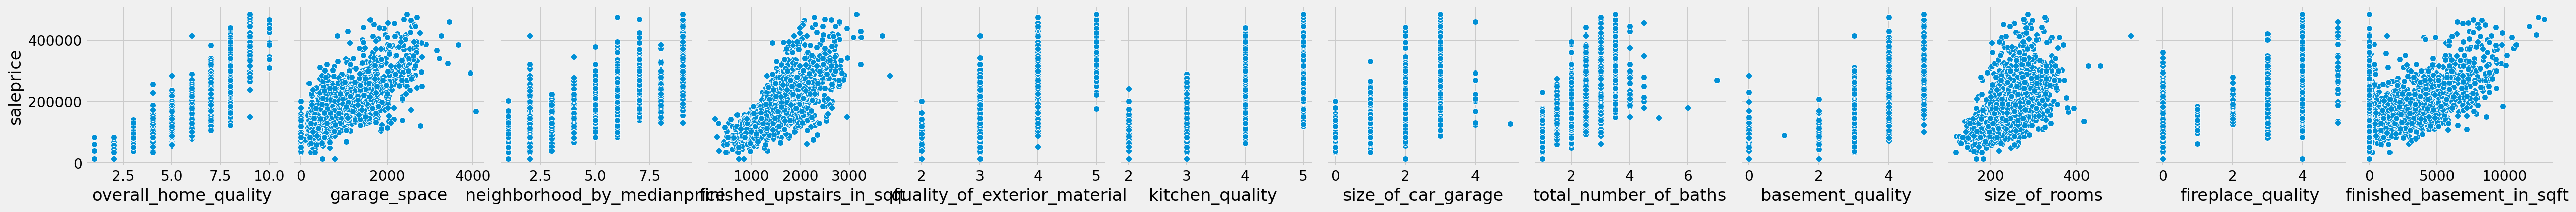

In [19]:
sns.pairplot(df_new, x_vars=top_corr_features.index, 
             y_vars=['saleprice'], height=3);

This pairplot illustrates the linear relationship between the top correlated features and saleprice

# Training and Testing Data
Now that we've explored and cleaned the data a bit, let's go ahead and split the data into training and testing sets. 

In [20]:
# Create X and y.
X = df_new.drop('saleprice', axis=1)# take all cols except, 'quality' --> response
y = df_new['saleprice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1423, 31)
(610, 31)
(1423,)
(610,)


In [23]:
X.columns

Index(['building_age', 'neighborhood_by_medianprice', 'positive_features',
       'remodeled_home', 'overall_home_quality', 'single_storey_home',
       'multiple_storey_home', 'quality_of_exterior_material',
       'type_of_exterior_covering_house', 'middle_unit_townhouse',
       'end_unit_townhouse', 'family_house', 'good_roof_quality',
       'masonry_veneer_sqft', 'home_functionality', 'lot_frontage', 'lot_size',
       'outdoor_porch_space', 'garage_space', 'size_of_car_garage',
       'paved_driveway', 'basement_quality', 'finished_basement_in_sqft',
       'basement_ceiling_height', 'heater_quality', 'kitchen_quality ',
       'fireplace_quality', 'total_number_of_baths',
       'finished_upstairs_in_sqft', 'rooms_upstairs', 'size_of_rooms'],
      dtype='object')

In [24]:
y

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2028    298751
2029     82500
2030    177000
2031    144000
2032    189000
Name: saleprice, Length: 2033, dtype: int64

### Benchmark RMSE based on average saleprice of all houses

Baseline score for the following model reference by using the Mean Root Square Error of the mean building sale price. We will be using various models and check their RMSE against this baseline score to see which models fit the best.

In [26]:
df = pd.read_csv("../datasets/train.csv")

In [27]:
df['y_avgsaleprice'] = df['SalePrice'].mean() #calculating the average score for saleprice and using it as the y_predictions, so we can generate a baseline score

In [28]:
from math import sqrt

In [29]:
rmse_baseline = sqrt(mean_squared_error(df['SalePrice'], df['y_avgsaleprice']))

In [30]:
print(f'Mean Root Square Error in dollars: {round(rmse_baseline,2)}.')

Mean Root Square Error in dollars: 79239.34.


### We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, and see which one yields the best model metric.

#### Linear Regression Model,  unscaled

In [31]:
#instantiate Linear Regression model
lr = LinearRegression()

In [32]:
#fitting model on unscaled data
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
print(len(lr.coef_)) #matches our number of columns
lr.coef_

31


array([-9.62434594e+01,  3.50281292e+03,  8.51521883e+03,  6.17790954e+03,
        8.90612472e+03, -8.52586639e+02, -8.97183225e+03,  1.23200176e+04,
        9.42881373e+02, -1.06603912e+04, -9.46426225e+03, -1.30044598e+03,
        5.17317498e+03,  1.91331560e+01,  1.41711019e+04,  1.01483457e+02,
        5.32560601e-01,  1.75831603e+01,  1.07078049e+01,  1.78381010e+03,
        7.25082439e+02,  2.26225317e+03,  5.20221002e+00,  1.79080998e+03,
        9.20297002e+02,  9.82491707e+03,  1.90951964e+03, -3.74426407e+03,
        4.01937041e+01,  2.80673242e+03,  9.68020577e+01])

In [34]:
X = sm.add_constant(X)
ols = sm.OLS(y, X).fit()

In [35]:
#let's take a quick look at the summary stats of our ordinary least squares
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     584.2
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:35:58   Log-Likelihood:                -23317.
No. Observations:                2033   AIC:                         4.670e+04
Df Residuals:                    2001   BIC:                         4.688e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.601e+05   1.05e+04    -15.233      0.000   -1.81e+05   -1.39e+05
building_age                      -78.3767     37.588     -2.085      0.037    -152.092      -4.661
neighborhood_by_medianprice      3725.2122    402.057      9.265      0.000    2936.718    4513.707
positive_features                8277.7045   1337.221      6.190      0.000    5655.214    1.09e+04
remodeled_home                   5223.1859   1232.910      4.236      0.000    2805.265    7641.107
overall_home_quality             9810.4228    729.659     13.445      0.000    8379.451    1.12e+04
single_storey_home              -1272.6878   1829.868     -0.696      0.487   -4861.335    2315.959
multiple_storey_home            -8670.1668   1611.817     -5.379      0.000   -1.18e+04   -5509.152
quality_of_exterior_material     1.148e+04   1600.097      7.177      0.000    8346.113    1.46e+04
type_of_exterior_covering_house  1019.8199    330.254      3.088      0.002     372.142    1667.498
middle_unit_townhouse           -1.301e+04   2372.888     -5.483      0.000   -1.77e+04   -8356.019
end_unit_townhouse              -8937.0017   3383.673     -2.641      0.008   -1.56e+04   -2301.111
family_house                    -4969.5882   3649.698     -1.362      0.173   -1.21e+04    2188.018
good_roof_quality                5524.9429   1442.082      3.831      0.000    2696.803    8353.083
masonry_veneer_sqft                21.1984      3.692      5.741      0.000      13.957      28.440
home_functionality               1.127e+04   1800.543      6.260      0.000    7740.989    1.48e+04
lot_frontage                       96.5133     32.339      2.984      0.003      33.092     159.935
lot_size                            0.4892      0.094      5.216      0.000       0.305       0.673
outdoor_porch_space                15.5251      3.775      4.112      0.000       8.121      22.929
garage_space                        9.0851      1.476      6.155      0.000       6.190      11.980
size_of_car_garage               1539.7508   1095.822      1.405      0.160    -609.321    3688.823
paved_driveway                   -421.4453   1122.224     -0.376      0.707   -2622.294    1779.404
basement_quality                 2419.5811    882.055      2.743      0.006     689.739    4149.423
finished_basement_in_sqft           5.0435      0.301     16.742      0.000       4.453       5.634
basement_ceiling_height          2557.4463    595.895      4.292      0.000    1388.807    3726.086
heater_quality                   1834.3115    688.119      2.666      0.008     484.807    3183.816
kitchen_quality                  9440.0643   1252.037      7.540      0.000    6984.632    1.19e+04
fireplace_quality                2014.2732    354.833      5.677      0.000    1318

In [36]:
# How does the model score (R^2) on the training and test data? R^2 scores are not very far off! 
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9021075609167194
0.8943876499227205


In [37]:
#let's evaluate our models! 
predictions = lr.predict(X_test)

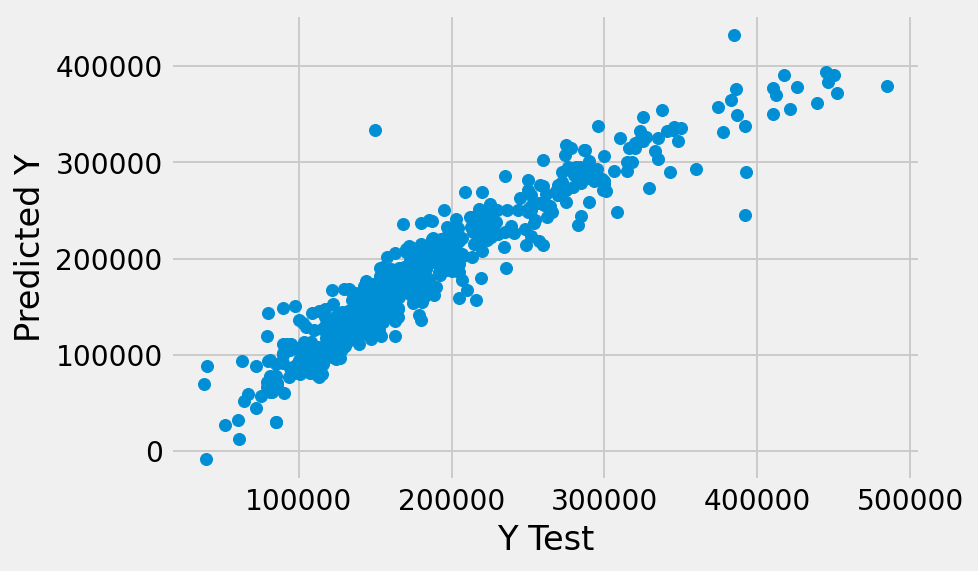

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

In the linear regression, the predicted values appear to be close to the actual values. However, most of the predicted values here are slightly larger than the actual values throughout. This means that you are over-estimating. Therefore, the model does not seem to provide an adequate fit and should be revised.

In [39]:
print('RMSE using OLS for unscaled data:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE using OLS for unscaled data: 24722.109690690886


Using a linear regression model decreases the RMSE score to 24722 dollars, as compared to the baseline score of 73422 dollars. However, as mentioned the model should be revised further.

#### Linear Regression Model, scaled (every model from here onwards will be scaled) 

In [40]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [41]:
lr_standardized = LinearRegression()

In [42]:
lr_standardized.fit(Z_train, y_train)

LinearRegression()

In [43]:
print(f' Scaled Linear Regression training R^2 score: {round(lr_standardized.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(lr_standardized.score(Z_test, y_test),4)}')

 Scaled Linear Regression training R^2 score: 0.9021
 Scaled Linear Regression test R^2 score: 0.8944


In [44]:
y_pred_lrstandard = lr_standardized.predict(Z_test)

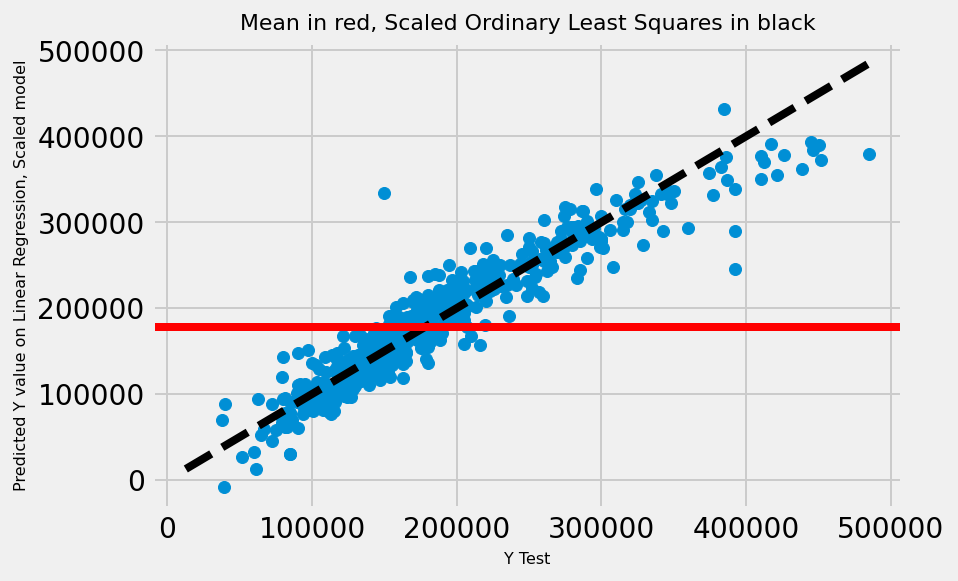

In [45]:
fig, ax = plt.subplots()

ax.scatter(y_test,y_pred_lrstandard)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')


ax.set_xlabel('Y Test', fontsize =8)
ax.set_ylabel('Predicted Y value on Linear Regression, Scaled model', fontsize=8);

plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black", fontsize=11)
plt.show()


In [46]:
print('RMSE using OLS for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lrstandard)))
print('This is the RMSE in dollars.')

RMSE using OLS for scaled data: 24722.109690692236
This is the RMSE in dollars.


In [47]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

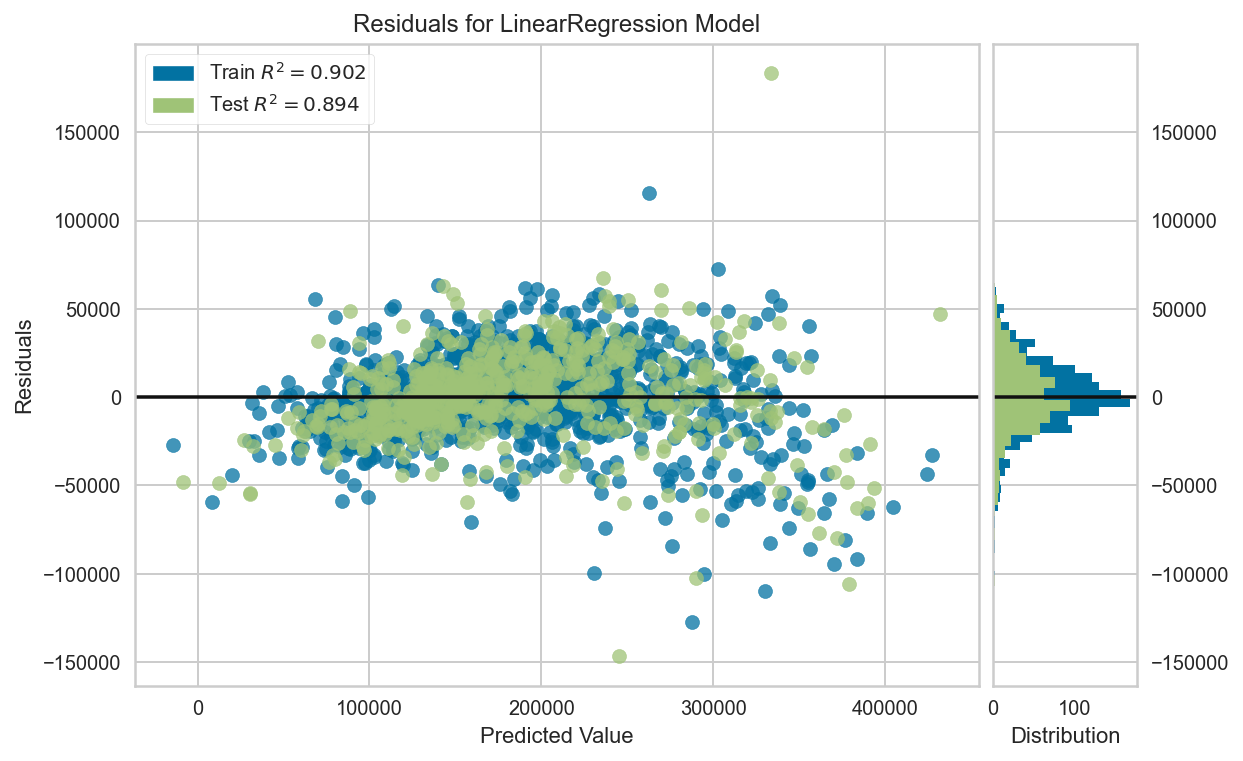

In [48]:
visualizer = ResidualsPlot(lr_standardized) 
#fit training data
visualizer.fit(Z_train, y_train)
# Generates predicted target values on test data  
visualizer.score(Z_test, y_test)  
#show plot and save it at given path
visualizer.show();

The residuals concentrate around the zero value, indicating that the R^2 is pretty high.

#### RidgeCV regression, scaled

In [49]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=7)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [50]:
print(f' RidgeCV Regression training R^2 score: {round(ridge_cv.score(Z_train, y_train),4)}')
print(f' RidgeCV Regression test R^2 score: {round(ridge_cv.score(Z_test, y_test),4)}')

 RidgeCV Regression training R^2 score: 0.9018
 RidgeCV Regression test R^2 score: 0.8947


In [51]:
# Here is the optimal value of alpha
ridge_cv.alpha_

46.4158883361278

In [52]:
ridge_preds = ridge_cv.predict(Z_test)

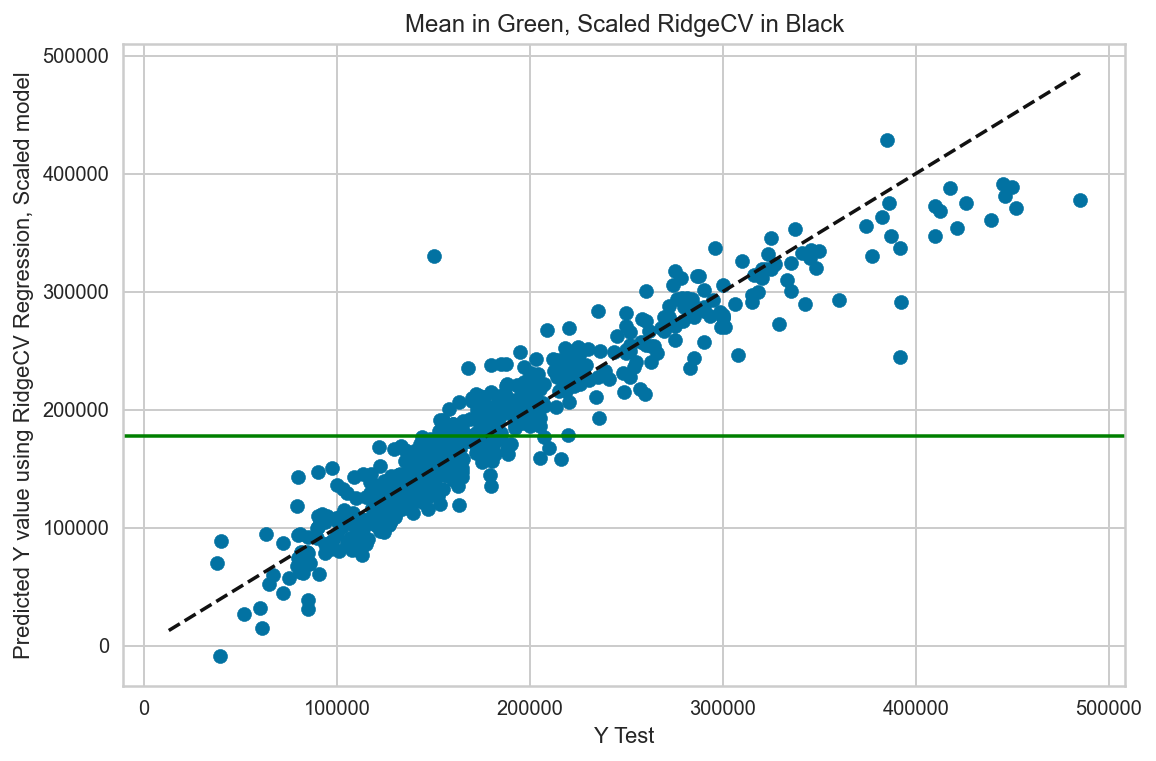

In [53]:
fig, ax = plt.subplots()

ax.scatter(y_test,ridge_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')


ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y value using RidgeCV Regression, Scaled model', fontsize=11);

plt.axhline(y_train.mean(),c='green')
plt.title("Mean in Green, Scaled RidgeCV in Black", fontsize=12)
plt.show()

Scaled RidgeCV scatterplot is similar to Scaled Linear Regression

In [54]:
print('RMSE using RidgeCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, ridge_preds)))
print('This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than OLS model')

RMSE using RidgeCV for scaled data: 24683.74143851315
This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than OLS model


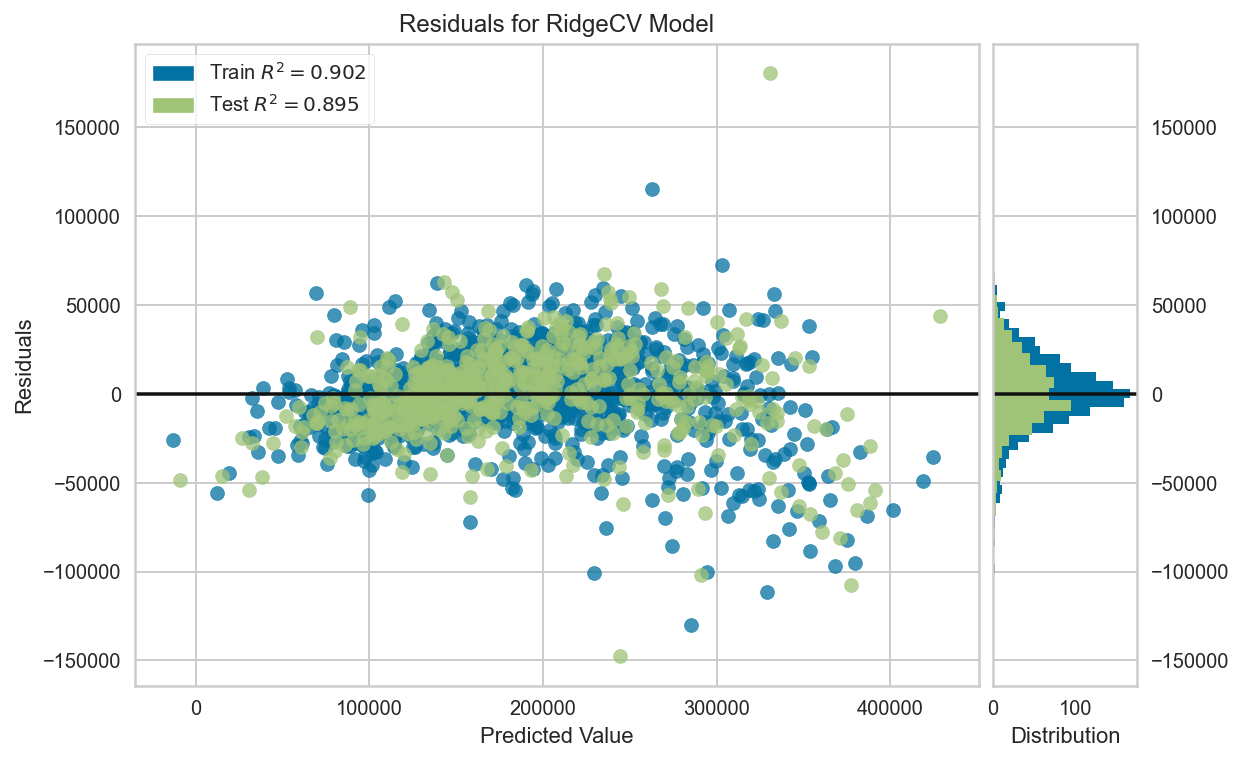

In [55]:
visualizer1 = ResidualsPlot(ridge_cv)
visualizer1.fit(Z_train, y_train)
visualizer1.score(Z_test, y_test)
visualizer1.show();

Residuals plot is similar to Scaled Linear Regression's, except test r^2 performs a bit better.

#### LassoCV regression, scaled

In [56]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 3, 500)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=7, max_iter=10000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

#best found alpha
lasso_cv.alpha_

100.46250617173403

In [57]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Z_train, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Z_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.9021
 LassoCV Regression test R^2 score: 0.8946


In [58]:
lasso_preds = lasso_cv.predict(Z_test)

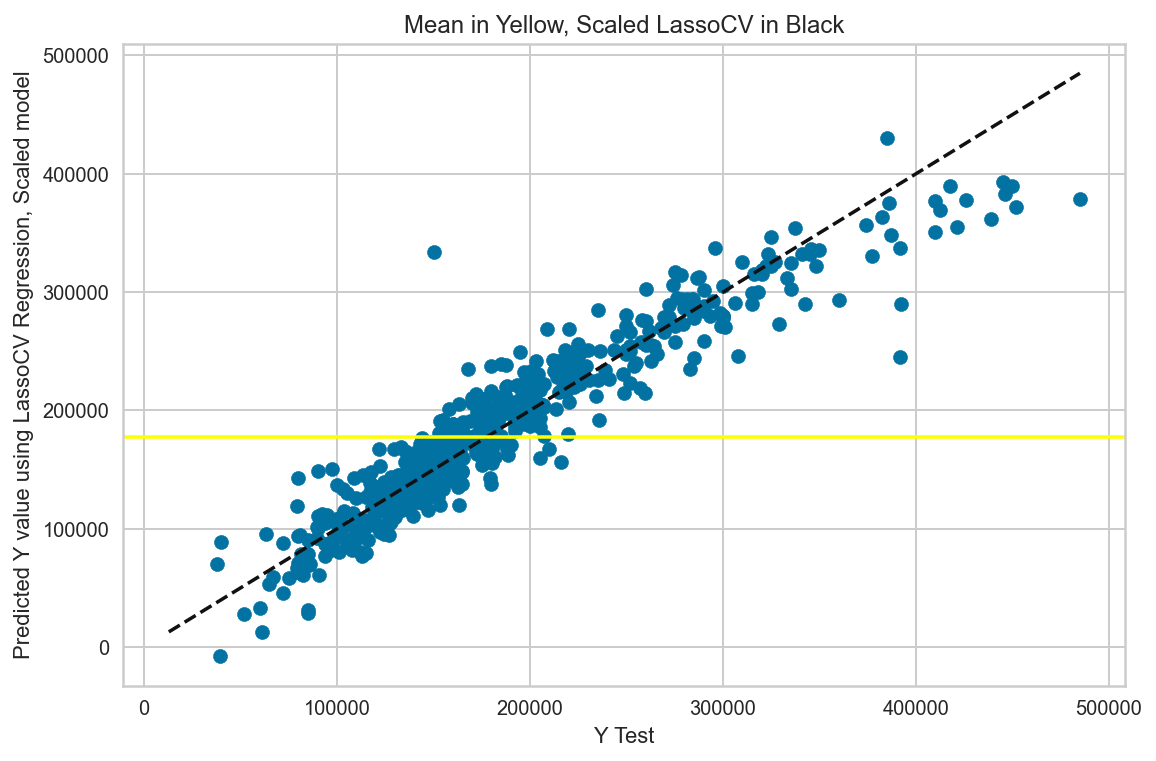

In [59]:
fig, ax = plt.subplots()

ax.scatter(y_test,lasso_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')


ax.set_xlabel('Y Test')
ax.set_ylabel('Predicted Y value using LassoCV Regression, Scaled model', fontsize=11);

plt.axhline(y_train.mean(),c='yellow')
plt.title("Mean in Yellow, Scaled LassoCV in Black", fontsize=12)
plt.show()

Again, similar scatterplot compared to Scaled Linear Regression and Scaled RidgeCV

In [60]:
print('RMSE using LassoCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, lasso_preds)))
print('This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than the OLS model but slightly worse than the ridgeCV regression')

RMSE using LassoCV for scaled data: 24697.64938941075
This is the RMSE in dollars. Based on RMSE, this model only performs slightly better than the OLS model but slightly worse than the ridgeCV regression


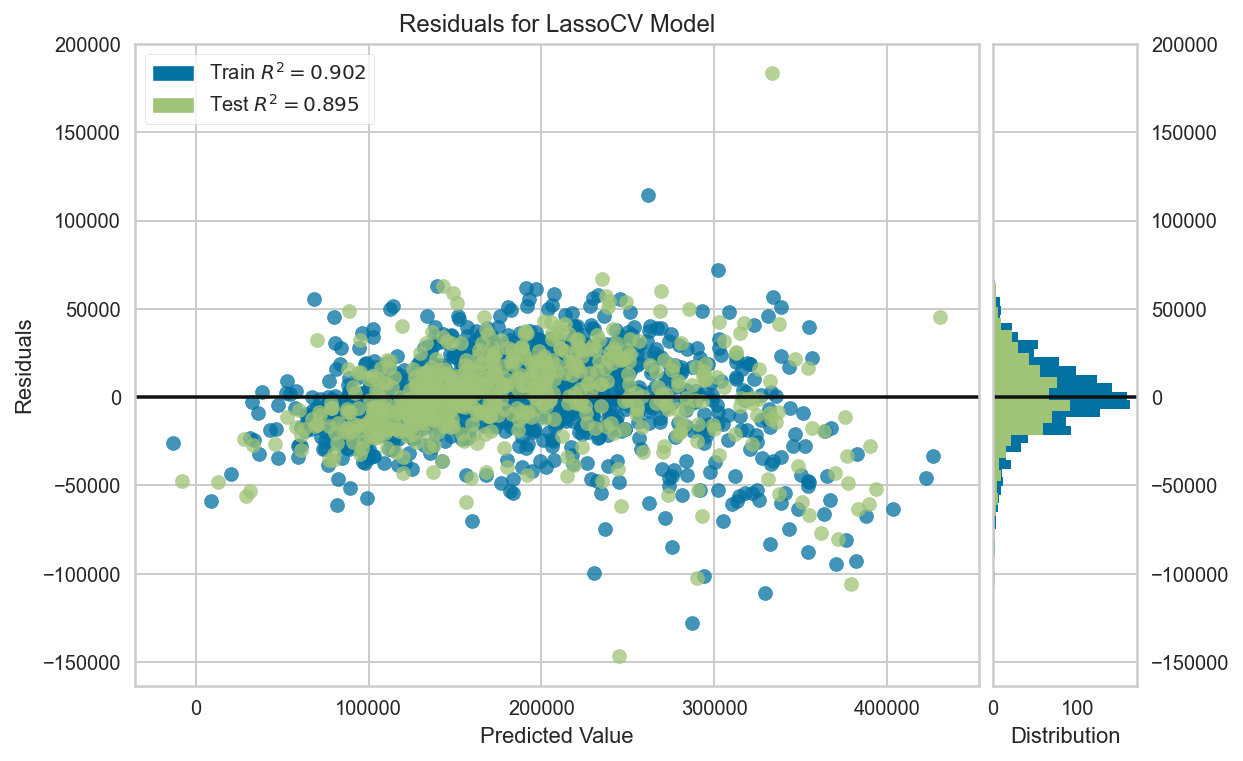

In [61]:
visualizer2 = ResidualsPlot(lasso_cv) 
#fit training data
visualizer2.fit(Z_train, y_train)
# Generates predicted target values on test data  
visualizer2.score(Z_test, y_test)  
#show plot and save it at given path
visualizer2.show();

Again, residual plots is also similar to previous models. 

In [62]:
# Reminder of results from evaluations before this
print(" OLS ".center(18, "="))# syntax: str.center(width, fillchar=' ')
print('R^2 score for train set:', lr_standardized.score(Z_train, y_train))
print('R^2 score for test set:',lr_standardized.score(Z_test, y_test))
print('RMSE using OLS for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lrstandard)))
print()
print(" Ridge ".center(18, "="))
print('R^2 score for train set:',ridge_cv.score(Z_train, y_train))
print('R^2 score for test set:',ridge_cv.score(Z_test, y_test))
print('RMSE using RidgeCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, ridge_preds)))
print()
print(" Lasso ".center(18, "="))
print('R^2 score for train set:',lasso_cv.score(Z_train, y_train))
print('R^2 score for test set:',lasso_cv.score(Z_test, y_test))
print('RMSE using LassoCV for scaled data:', np.sqrt(metrics.mean_squared_error(y_test, lasso_preds)))

====== OLS =======
R^2 score for train set: 0.9021075609167194
R^2 score for test set: 0.8943876499227089
RMSE using OLS for scaled data: 24722.109690692236

===== Ridge ======
R^2 score for train set: 0.9017884429701811
R^2 score for test set: 0.8947152123267564
RMSE using RidgeCV for scaled data: 24683.74143851315

===== Lasso ======
R^2 score for train set: 0.9020508450295919
R^2 score for test set: 0.8945965343551446
RMSE using LassoCV for scaled data: 24697.64938941075


#### Apply a power transform, featurewise, to make data more Gaussian-like (Gaussian is another name for normal distribution). 

In [63]:
#Model prep: Scaling with standardscaler and with powertransformer
pt = PowerTransformer()

In [64]:
# repeating train-test split from original df's X, y
X_train_pwr, X_test_pwr, y_train_pwr, y_test_pwr = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X_train_pwr = pt.fit_transform(X_train_pwr)
X_test_pwr = pt.transform(X_test_pwr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [66]:
pt_y = PowerTransformer()

# PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
# while we didn't need to do this with X_train, which was already a dataframe
y_train_pt = pt_y.fit_transform(y_train_pwr.to_frame())
y_test_pt = pt_y.transform(y_test_pwr.to_frame())

In [67]:
# instantiating the same 3 models as before: linear regression, lassoCV and ridgeCV
lr_pwr = LinearRegression()
lasso_pwr = LassoCV(n_alphas=200)
ridge_pwr = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [68]:
# cross validating the above instantiated models
lr_pwr_scores = cross_val_score(lr_pwr, X_train_pwr, y_train_pt, cv=7)
print(f'lr_power: {lr_pwr_scores.mean()}')

lasso_pwr_scores = cross_val_score(lasso_pwr, X_train_pwr, y_train_pt[:, 0], cv=7)
print(f'lasso_power: {lasso_pwr_scores.mean()}')

ridge_pwr_scores = cross_val_score(ridge_pwr, X_train_pwr, y_train_pt, cv=7)
print(f'ridge_power: {ridge_pwr_scores.mean()}')

lr_power: 0.8878846292365302
lasso_power: 0.8879156384819578
ridge_power: 0.8880553869348694


Since applying a power transformer makes the cross validation scores fare worse than using standard scaler, we will forgo using power transformer. 

###### Models utilizing Pipeline and Gridsearch. A glance at Lasso, Ridge and Elastic net
- Pipeline saves time by executing scaling, model initiation and polynomial feature creation.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [70]:
pipe_ridge = Pipeline([
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

In [71]:
#create parameters for gridsearch
ridge_params1 = {'ridge__alpha':np.logspace(-1, 3, 500),
               'ridge__max_iter':[10000]}

In [72]:
#apply pipeline and gridsearch to GridSearchCV
pipe_ridge_gridsearch = GridSearchCV(
                                pipe_ridge, 
                                param_grid=ridge_params1,
                            )

In [73]:
#fit best result from grid search
pipe_ridge_gridsearch.fit(X_train, y_train)
pipe_ridge_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('ridge', Ridge(alpha=39.55436244734702, max_iter=10000))])

In [74]:
pipe_ridge_gridsearch.best_score_ #this is based on Z train and y_train

0.8934184892752766

In [75]:
# Evaluate the best fit model on the test data.
pipe_ridge_gridsearch.score(X_test, y_test)

0.8946907950665246

In [76]:
y_preds_ridgegridsearch = pipe_ridge_gridsearch.predict(X_test)

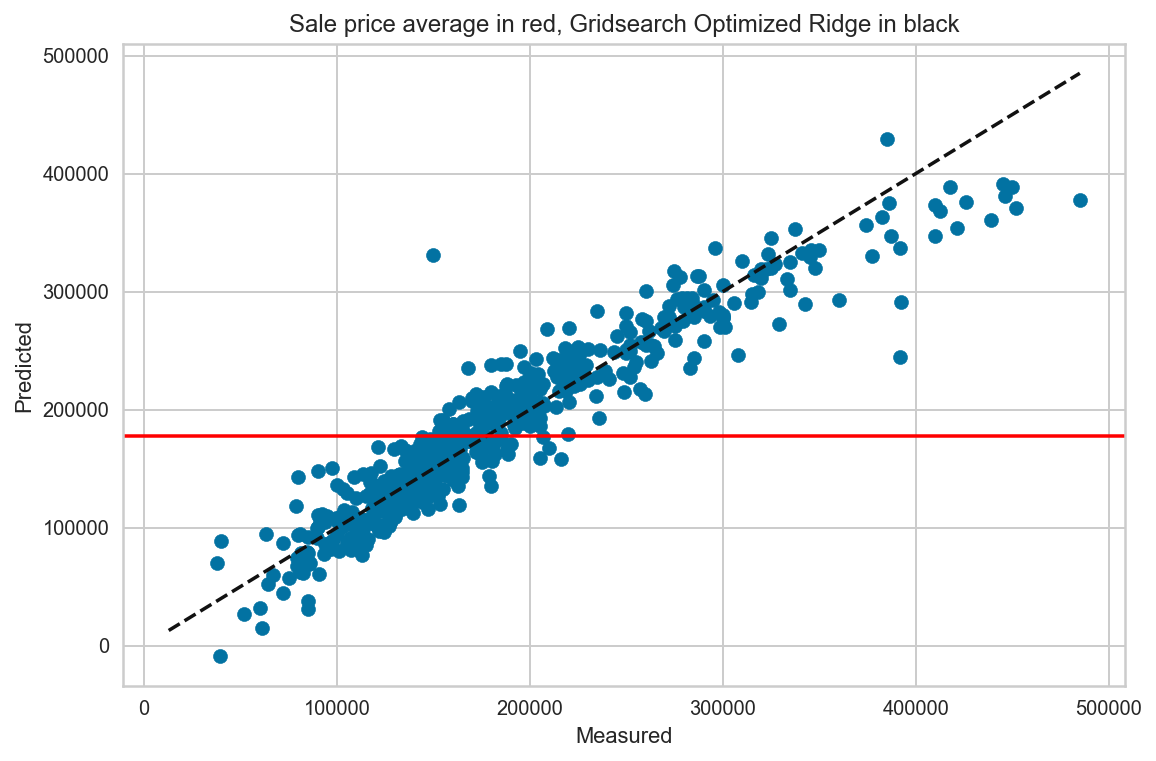

In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_ridgegridsearch)

ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

In [78]:
print('RMSE using GridSearch_Ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_ridgegridsearch)))
print('This is the RMSE in dollars.')

RMSE using GridSearch_Ridge: 24686.603553786572
This is the RMSE in dollars.


#### Now lasso

In [79]:
pipe_lasso = Pipeline([
    ('sc', StandardScaler()),
    ('lassocv', Lasso())
])

In [80]:
lasso_params = {'lassocv__alpha':np.logspace(-1, 3, 1000),
               'lassocv__max_iter':[5000],
               'lassocv__warm_start':[True]}

In [81]:
pipe_lasso_gridsearch = GridSearchCV(pipe_lasso, 
                               param_grid=lasso_params)

In [82]:
pipe_lasso_gridsearch.fit(X_train, y_train)
pipe_lasso_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=85.29644499741025, max_iter=5000,
                       warm_start=True))])

In [83]:
pipe_lasso_gridsearch.best_score_

0.893175622898122

In [84]:
# Evaluate the best fit model on the test data.
pipe_lasso_gridsearch.score(X_test, y_test)

0.8945712520143212

In [85]:
y_preds_lasso = pipe_lasso_gridsearch.predict(X_test)

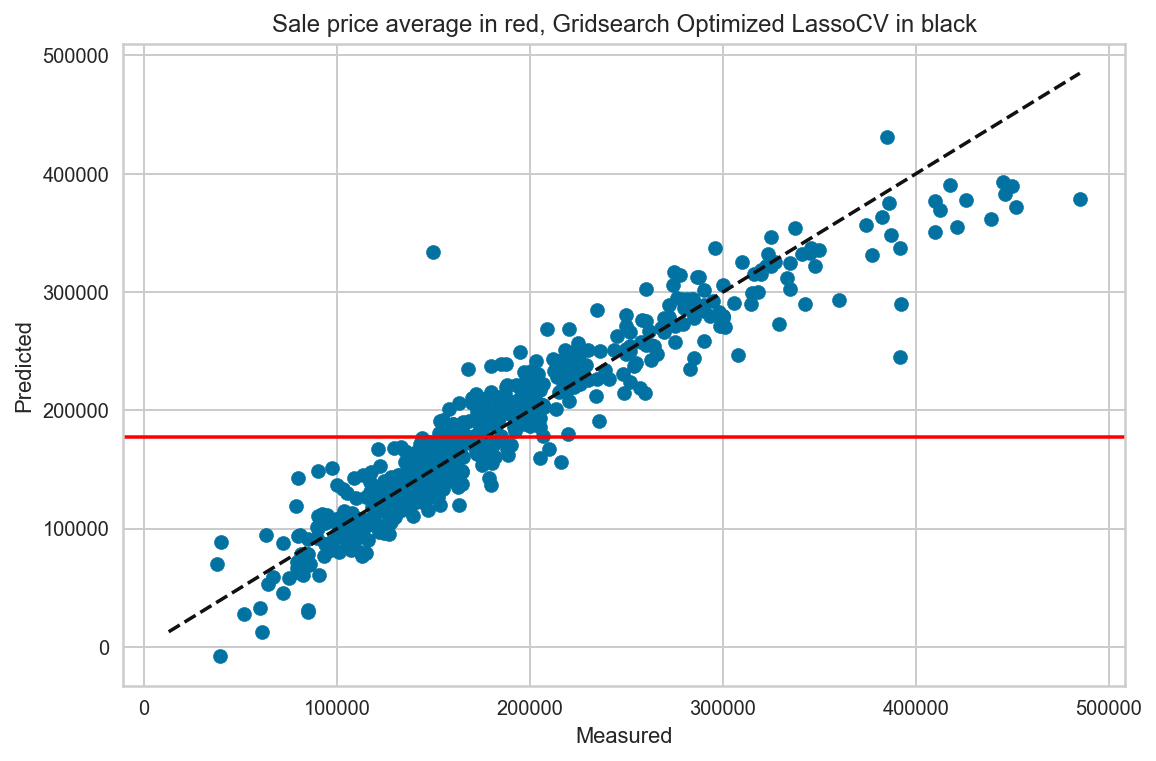

In [86]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_lasso)

ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized LassoCV in black")
plt.show()

In [87]:
print('RMSE using GridSearch_Lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_lasso)))
print('This is the RMSE in dollars.')

RMSE using GridSearch_Lasso: 24700.61123201559
This is the RMSE in dollars.


##### Now Elastic Net

In [88]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [89]:
pipe_elastic = Pipeline([
            ('sc', StandardScaler()),
            ('elasticnet', ElasticNet())
                        ])

In [90]:
parameters_elastic = {'elasticnet__alpha': np.logspace(-1, 4, 500),
                      'elasticnet__selection': ['cyclic', 'random'],
                        'elasticnet__max_iter': [10000],
                        'elasticnet__warm_start': [True]
                       }

In [91]:
elastic_net_model = GridSearchCV(
                pipe_elastic, 
           param_grid= parameters_elastic)
elastic_net_model.fit(X_train, y_train)
elastic_net_model.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, max_iter=10000, warm_start=True))])

In [92]:
elastic_net_model.best_score_

0.8933848380297544

In [93]:
elastic_net_model.score(X_test, y_test)

0.8947561286903017

In [94]:
y_preds_en = elastic_net_model.predict(X_test)

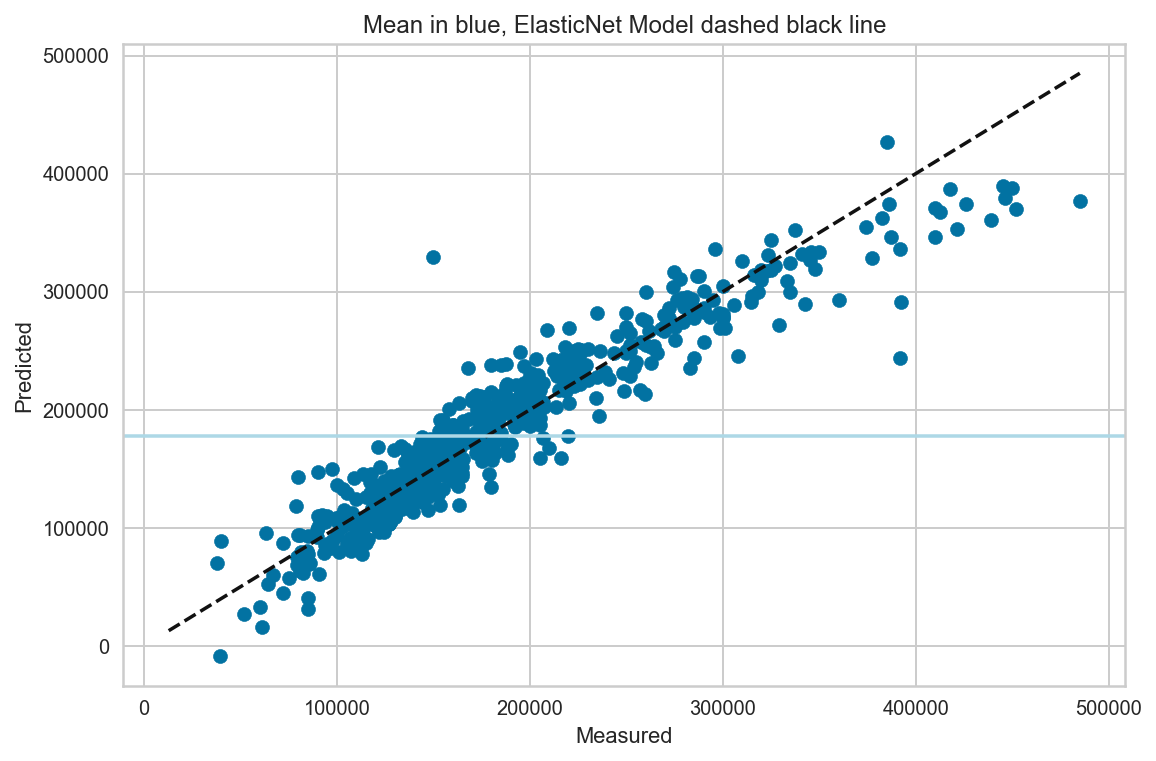

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_preds_en)

ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.axhline(y_train.mean(),c='lightblue')
plt.title("Mean in blue, ElasticNet Model dashed black line")
plt.show()

In [96]:
print('RMSE using GridSearch_Elastic:', np.sqrt(metrics.mean_squared_error(y_test, y_preds_en)))
print('This is the RMSE in dollars.')

RMSE using GridSearch_Elastic: 24678.944605539004
This is the RMSE in dollars.


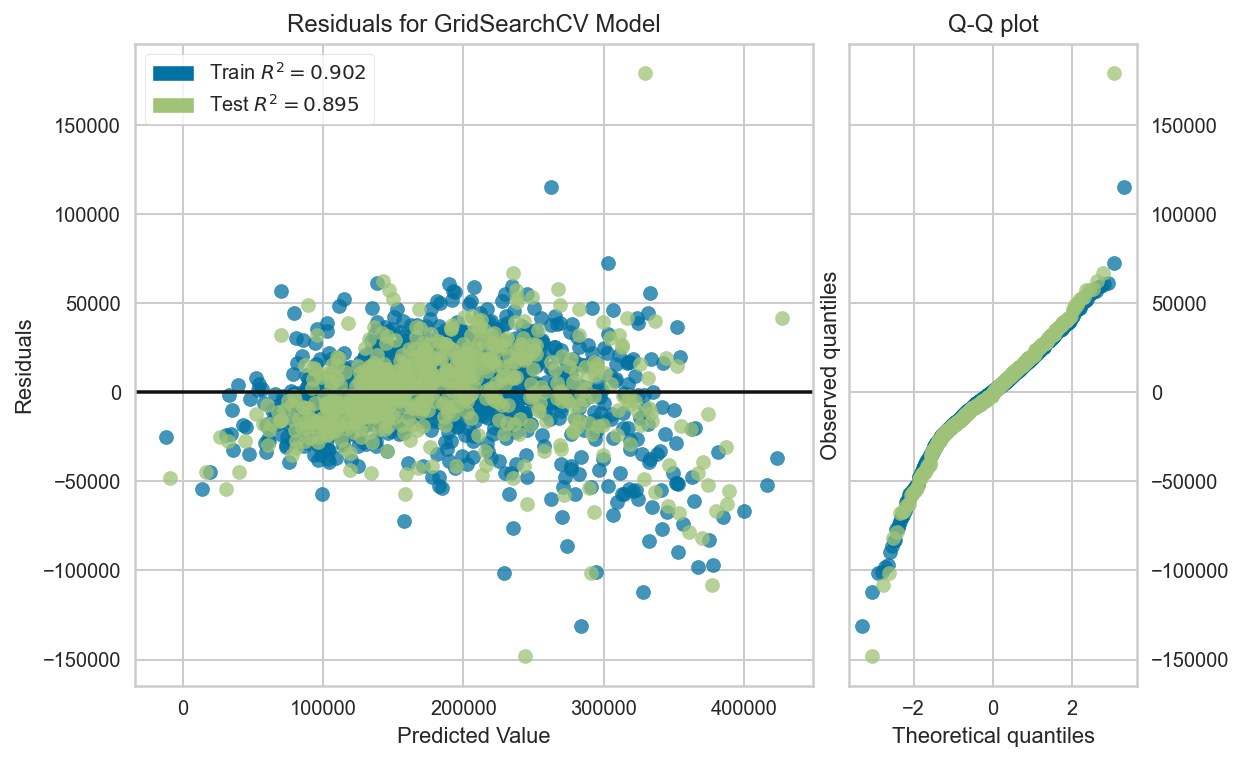

In [97]:
visualizer5 = ResidualsPlot(elastic_net_model, hist=False, qqplot=True) 
#fit training data
visualizer5.fit(X_train, y_train)
# Generates predicted target values on test data  
visualizer5.score(X_test, y_test)  
#show plot and save it at given path
visualizer5.show();

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. However based on the qqplot (quantile-quantile plot), if the residuals are normally distributed, then their quantiles when plotted against quantiles of normal distribution should form a straight line. Our data does not appear to be normally distributed. 

### A Summary of Models Used 

|Models Used|R^2(Train)|R^2(Test)|Root Mean Square Error in Dollars|Pipeline Built|Hyperparameter Optimization|Remarks
|---|---|---|---|---|---|---|
|Unscaled Linear Regression|0.9021|0.8943|24,722|No|No||
|Scaled Linear Regression|0.9021|0.8944|24,722|No|No|
|RidgeCV Linear Regression|0.9018|0.8947|24,683|No|Standard Scaler, Alphas using RidgeCV|
|RidgeCV Linear Regression V2|0.8934|0.8946|24,686|Yes|Standard Scaler, Alphas using GridSearch|
|LassoCV Linear Regression|0.9021|0.8946|24,697|No|Standard Scaler, Alphas using LassoCV|
|LassoCV Linear Regression V2|0.8931|0.8945|24,700|Yes|Standard Scaler, Alphas using GridSearch|
|Elastic Net Linear Regression|0.9019|0.8947|24,678|Yes|Standard Scaler, Alphas using GridSearch|Combines Ridge and Lasso|

### Since the ElasticNet is the best model in terms of the test score and RMSE score, we will use it!

In [98]:
elastic_net_model.fit(X_train, y_train)# fitting ridgeCV instantiated model

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': array([1.00000000e-01, 1.02334021e-01, 1.04722519e-01, 1.07166765e-01,
       1.09668060e-01, 1.12227736e-01, 1.14847155e-01, 1.17527712e-01,
       1.20270833e-01, 1.23077980e-01, 1.25950646e-01, 1.28890361e-01,
       1.31898690e-01, 1.34977233e-01, 1.381276...
       7.07455942e+03, 7.23968114e+03, 7.40865683e+03, 7.58157646e+03,
       7.75853206e+03, 7.93961785e+03, 8.12493021e+03, 8.31456781e+03,
       8.50863158e+03, 8.70722485e+03, 8.91045332e+03, 9.11842520e+03,
       9.33125118e+03, 9.54904456e+03, 9.77192128e+03, 1.00000000e+04]),
                         'elasticnet__max_iter': [10000],
                         'elasticnet__selection': ['cyclic', 'random'],
                         'elasticnet__warm_start': [True]})

In [99]:
elastic_net_model.score(X_train, y_train)

0.9015017396243188

In [100]:
elastic_net_model.score(X_test, y_test)

0.8947561286903017

In [101]:
y_pred = elastic_net_model.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) # comparing model predictions vs true observations

0.8947561286903017

In [102]:
elastic_net_model.best_estimator_.named_steps['elasticnet'].coef_

array([-2546.71389777,  7732.21523705,  3287.68958254,  2833.63331914,
       11391.10707831,  -340.41954729, -3630.90487025,  7016.08414191,
        2020.89723301, -2732.5475921 , -1877.80952936,  -288.39650612,
        2214.39445995,  3354.68425373,  4184.09633913,  2367.17220829,
        3712.14433618,  2865.10404212,  6655.10500239,  1792.11152594,
         578.16187938,  2322.63031519, 11652.77203245,  2170.93560014,
        1081.99185978,  6460.64736912,  3787.70412859, -1509.37270226,
       13964.46029178,  6290.00786407,  6277.37353237])

In [103]:
clf = elastic_net_model.best_estimator_.named_steps['elasticnet'].coef_

In [104]:
import pickle

In [105]:
filename = 'finalized_model.sav'

In [106]:
pickle.dump(elastic_net_model, open(filename, 'wb'))

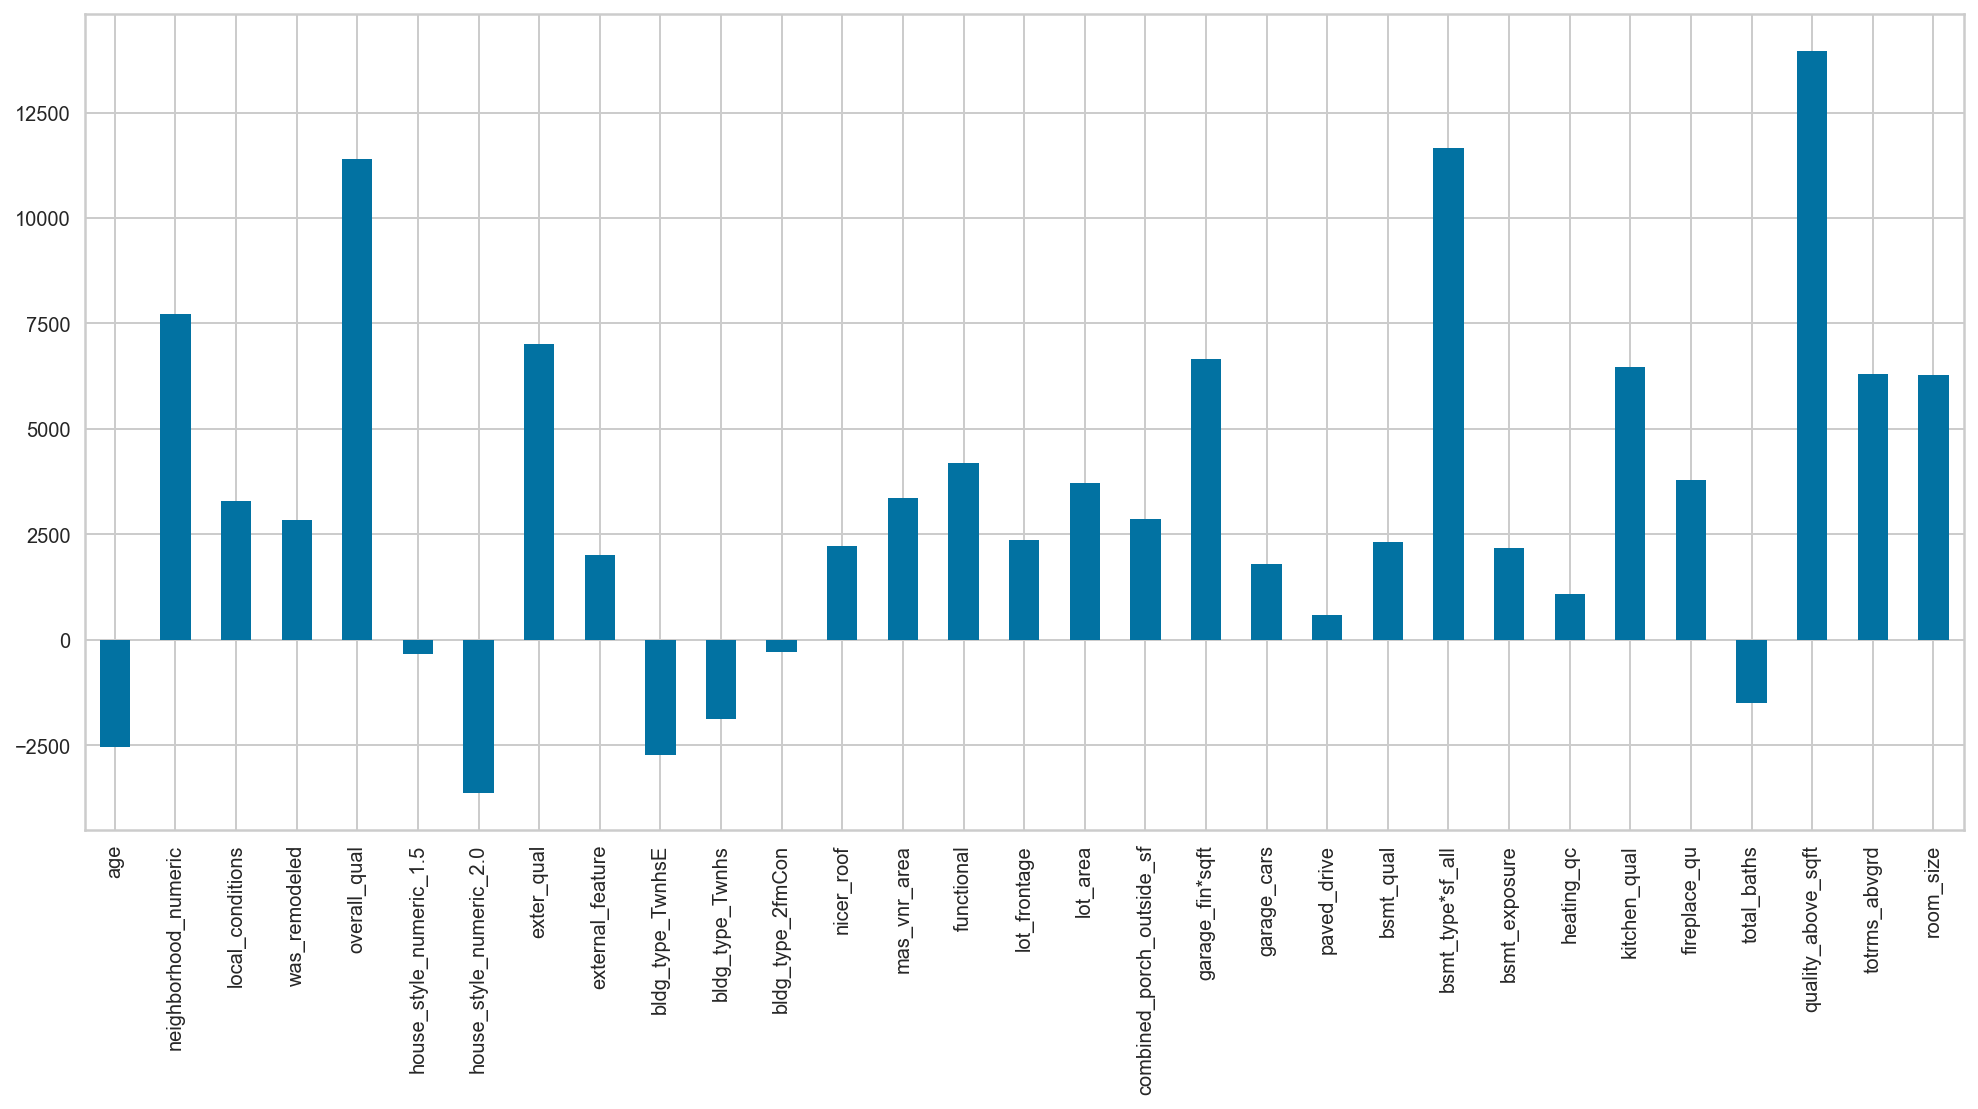

In [107]:
# plotting coefficients with corresponding features
pd.Series(clf, index=['age', 'neighborhood_numeric', 'local_conditions', 'was_remodeled',
       'overall_qual', 'house_style_numeric_1.5', 'house_style_numeric_2.0',
       'exter_qual', 'external_feature', 'bldg_type_TwnhsE', 'bldg_type_Twnhs',
       'bldg_type_2fmCon', 'nicer_roof', 'mas_vnr_area', 'functional',
       'lot_frontage', 'lot_area', 'combined_porch_outside_sf',
       'garage_fin*sqft', 'garage_cars', 'paved_drive', 'bsmt_qual',
       'bsmt_type*sf_all', 'bsmt_exposure', 'heating_qc', 'kitchen_qual',
       'fireplace_qu', 'total_baths', 'quality_above_sqft', 'totrms_abvgrd',
       'room_size']).plot.bar(figsize=(15, 7));

In [108]:
X.columns

Index(['const', 'building_age', 'neighborhood_by_medianprice',
       'positive_features', 'remodeled_home', 'overall_home_quality',
       'single_storey_home', 'multiple_storey_home',
       'quality_of_exterior_material', 'type_of_exterior_covering_house',
       'middle_unit_townhouse', 'end_unit_townhouse', 'family_house',
       'good_roof_quality', 'masonry_veneer_sqft', 'home_functionality',
       'lot_frontage', 'lot_size', 'outdoor_porch_space', 'garage_space',
       'size_of_car_garage', 'paved_driveway', 'basement_quality',
       'finished_basement_in_sqft', 'basement_ceiling_height',
       'heater_quality', 'kitchen_quality ', 'fireplace_quality',
       'total_number_of_baths', 'finished_upstairs_in_sqft', 'rooms_upstairs',
       'size_of_rooms'],
      dtype='object')

In [109]:
coefficients = pd.DataFrame(clf,X.columns[1:])#there is an extra "const" as column 0 so we would take the age column on wards
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
building_age,-2546.713898
neighborhood_by_medianprice,7732.215237
positive_features,3287.689583
remodeled_home,2833.633319
overall_home_quality,11391.107078
single_storey_home,-340.419547
multiple_storey_home,-3630.904870
quality_of_exterior_material,7016.084142
type_of_exterior_covering_house,2020.897233
middle_unit_townhouse,-2732.547592


This shows a list of features based on their coefficients, after the final model is applied.

In [110]:
coefficient_sorted = coefficients.sort_values(by='Coefficient',ascending=False) #arrange features based on their highest features
highest_df = coefficient_sorted.head(10)

In [111]:
coefficient_sorted.head(34)

,Coefficient
finished_upstairs_in_sqft,13964.460292
finished_basement_in_sqft,11652.772032
overall_home_quality,11391.107078
neighborhood_by_medianprice,7732.215237
quality_of_exterior_material,7016.084142
garage_space,6655.105002
kitchen_quality,6460.647369
rooms_upstairs,6290.007864
size_of_rooms,6277.373532
home_functionality,4184.096339


In [112]:
coefficient_sorted.tail(10)

,Coefficient
size_of_car_garage,1792.111526
heater_quality,1081.991860
paved_driveway,578.161879
family_house,-288.396506
single_storey_home,-340.419547
total_number_of_baths,-1509.372702
end_unit_townhouse,-1877.809529
building_age,-2546.713898
middle_unit_townhouse,-2732.547592
multiple_storey_home,-3630.904870


These are the bottom 10 features which hurt the value of a home the most.

In [113]:
highest_df.reset_index()

,index,Coefficient
0,finished_upstairs_in_sqft,13964.460292
1,finished_basement_in_sqft,11652.772032
2,overall_home_quality,11391.107078
3,neighborhood_by_medianprice,7732.215237
4,quality_of_exterior_material,7016.084142
5,garage_space,6655.105002
6,kitchen_quality,6460.647369
7,rooms_upstairs,6290.007864
8,size_of_rooms,6277.373532
9,home_functionality,4184.096339


In [114]:
highest_df = highest_df.reset_index() #reset index

In [115]:
highest_df.rename(columns={"index": "Features"}, inplace=True)

In [116]:
highest_df

,Features,Coefficient
0,finished_upstairs_in_sqft,13964.460292
1,finished_basement_in_sqft,11652.772032
2,overall_home_quality,11391.107078
3,neighborhood_by_medianprice,7732.215237
4,quality_of_exterior_material,7016.084142
5,garage_space,6655.105002
6,kitchen_quality,6460.647369
7,rooms_upstairs,6290.007864
8,size_of_rooms,6277.373532
9,home_functionality,4184.096339


These are the top 10 features which appear to add the most value to a home.

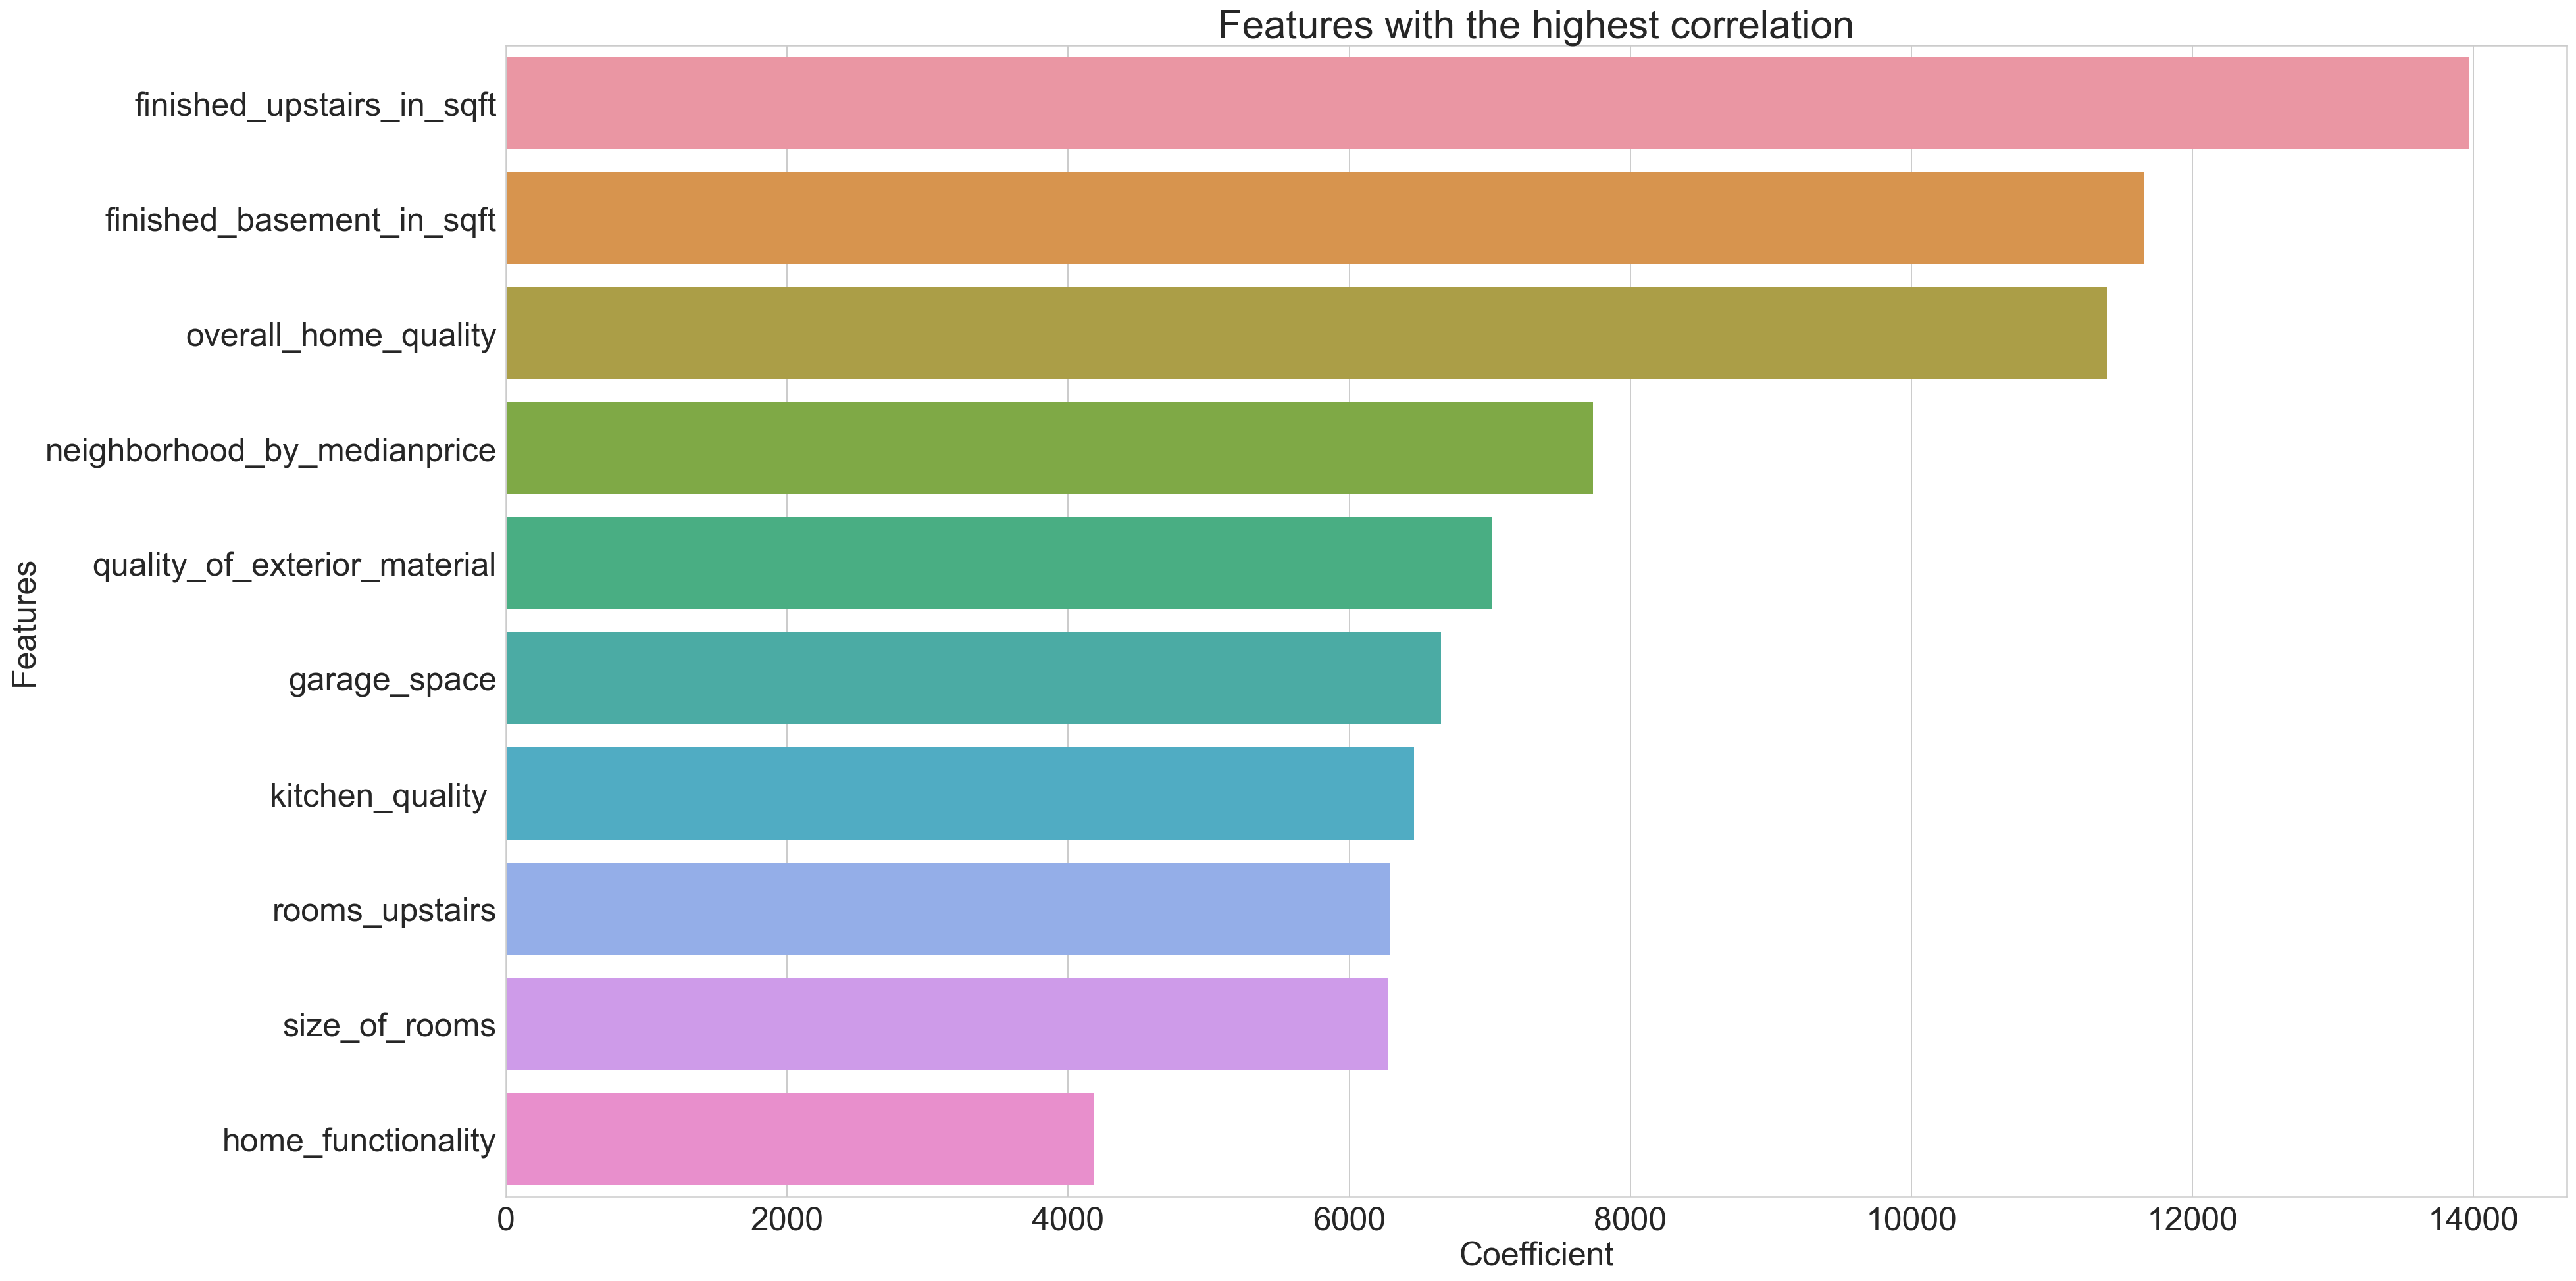

In [117]:
plt.figure(figsize=(25, 15))
sns.barplot(data=highest_df, x='Coefficient', y= 'Features')
plt.xticks (fontsize = 25)
plt.yticks (fontsize = 25)
plt.title('Features with the highest correlation',fontsize = 30)
plt.xlabel('Coefficient', fontsize = 25)
plt.ylabel('Features',fontsize = 25);

### After implementing Elastic Net Regression as the final model, we can see that these are the top 10 features that our company would advise novice property flippers to modify in order to gain the highest profits. 

- To raise the saleprices of their houses, home owners could consider improving the quality of both the basement and quality of 2nd floors and above. This could include adding additional game rooms (e.g. pool tables, in-home cinemas) and making repairs to any faults on these floors.
- Cleaning up and upgrading your garage space is a great yet simple way to increase the saleprices of the house. 
- Having a well equipped kitchen, including in-built ovens, state-of-the-art cooker hobs/induction cookers would make your house sell for a high price. Apparently locals in Ames love to cook!
- Perhaps breaking down walls between rooms to create bigger space is an excellent idea to increase saleprices as well. 


### Evaluation of Model
- The Elastic Net Regression may work for another city in the U.S, but now so much for places like Singapore given that our housing setup is vastly different.If we were to compare to another city in the U.S., we could draw the sample for assessed values for individual residential properties sold in other cities from 2006 to 2010 (similar to this dataset from Ames, Iowa). 

## Streamlit

Remember to try out our ProPrata app (refer to streamlit.py, run via terminal)